In [1]:
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import io

In [2]:
# Set float format for display (e.g., 2 decimal places)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
#using DataCleaning Module

sys.path.append('/kaggle/input/modules/pyfiles/')
from datacleaning import DataCleaning

In [4]:
data = pd.read_csv("/kaggle/input/london-house-price-prediction-advanced-techniques/train.csv")

# Use the class
cleaner = DataCleaning(data)
cleaner.show_info()
cleaner.drop_duplicates()
cleaner.fill_missing(strategy='median', columns=['bathrooms', 'bedrooms', 'livingRooms', 'floorAreaSqM'])
cleaner.fill_missing(strategy='mode', columns=['tenure', 'propertyType', 'currentEnergyRating'])
cleaner.remove_outliers(columns=['price', 'floorAreaSqM', 'bathrooms', 'bedrooms', 'livingRooms', 'floorAreaSqM'])
cleaner.drop_duplicates()
cleaner.show_info()

# Get the cleaned data
df = cleaner.get_clean_data()
df.describe()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266325 entries, 0 to 266324
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   266325 non-null  int64  
 1   fullAddress          266325 non-null  object 
 2   postcode             266325 non-null  object 
 3   country              266325 non-null  object 
 4   outcode              266325 non-null  object 
 5   latitude             266325 non-null  float64
 6   longitude            266325 non-null  float64
 7   bathrooms            217846 non-null  float64
 8   bedrooms             241482 non-null  float64
 9   floorAreaSqM         252519 non-null  float64
 10  livingRooms          229285 non-null  float64
 11  tenure               260604 non-null  object 
 12  propertyType         265817 non-null  object 
 13  currentEnergyRating  209511 non-null  object 
 14  sale_month           266325 non-null  int64  
 15  sale_y

,ID,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,sale_month,sale_year,price
count,154323.00,154323.00,154323.00,154323.00,154323.00,154323.00,154323.00,154323.00,154323.00,154323.00
mean,130606.38,51.51,-0.10,1.00,1.90,70.81,1.00,6.80,2011.92,343903.89
std,76425.08,0.06,0.09,0.00,0.71,21.12,0.00,3.37,9.12,224740.49
min,0.00,51.39,-0.35,1.00,1.00,10.00,1.00,1.00,1995.00,10000.00
25%,64512.50,51.47,-0.15,1.00,1.00,55.00,1.00,4.00,2004.00,175000.00
50%,128918.00,51.51,-0.10,1.00,2.00,69.00,1.00,7.00,2014.00,305000.00
75%,196469.00,51.55,-0.04,1.00,2.00,85.00,1.00,10.00,2021.00,455000.00
max,266322.00,51.66,0.14,1.00,4.00,130.00,1.00,12.00,2023.00,1300000.00


In [5]:
from IPython.display import display, Markdown

questions = """
1. How has the average price changed yearly/monthly? Are there cyclical patterns (e.g., post-2008 crash, Brexit, COVID)?  
2. Which years had the highest price variance (e.g., economic shocks)?  
3. Do prices in certain areas (`outcode`) lag/lead others in trends?  
4. Are there statistically significant spatial clusters (e.g., high-price zones in Kensington)?  
5. Does proximity to central London (e.g., Charing Cross) correlate with price?  
6. Do prices near borough boundaries differ significantly?  
7. Does `price / floorAreaSqM` reveal undervalued/overvalued properties?  
8. Does `bathrooms / bedrooms` impact price (luxury effect)?  
9. Do higher `currentEnergyRating` homes sell faster or at a premium?  
10. Are leasehold flats cheaper than freehold houses?  
11. Do rare `propertyType` (e.g., "mansion") have outlier prices?  
12. Do certain `outcode` prefixes (e.g., "SW1") command higher prices?  
13. Are there suspiciously low prices (e.g., right-to-buy sales)?  
14. Do homes with abnormally high `floorAreaSqM` but few rooms exist?  
15. Are there properties with mismatched `latitude/longitude` (e.g., outside London)?  
16. Does the price increase per bedroom vary by `outcode`?  
17. Do features like `floorAreaSqM` show diminishing returns on price?  
18. Does `propertyType × tenure` explain price better than either alone?  
19. Are recent sales (`sale_year=2023`) structurally different?  
20. Do prices correlate with external data (e.g., income by postcode)?
"""
display(Markdown(questions))


1. How has the average price changed yearly/monthly? Are there cyclical patterns (e.g., post-2008 crash, Brexit, COVID)?  
2. Which years had the highest price variance (e.g., economic shocks)?  
3. Do prices in certain areas (`outcode`) lag/lead others in trends?  
4. Are there statistically significant spatial clusters (e.g., high-price zones in Kensington)?  
5. Does proximity to central London (e.g., Charing Cross) correlate with price?  
6. Do prices near borough boundaries differ significantly?  
7. Does `price / floorAreaSqM` reveal undervalued/overvalued properties?  
8. Does `bathrooms / bedrooms` impact price (luxury effect)?  
9. Do higher `currentEnergyRating` homes sell faster or at a premium?  
10. Are leasehold flats cheaper than freehold houses?  
11. Do rare `propertyType` (e.g., "mansion") have outlier prices?  
12. Do certain `outcode` prefixes (e.g., "SW1") command higher prices?  
13. Are there suspiciously low prices (e.g., right-to-buy sales)?  
14. Do homes with abnormally high `floorAreaSqM` but few rooms exist?  
15. Are there properties with mismatched `latitude/longitude` (e.g., outside London)?  
16. Does the price increase per bedroom vary by `outcode`?  
17. Do features like `floorAreaSqM` show diminishing returns on price?  
18. Does `propertyType × tenure` explain price better than either alone?  
19. Are recent sales (`sale_year=2023`) structurally different?  
20. Do prices correlate with external data (e.g., income by postcode)?


1. How has the average price changed yearly/monthly? Are there cyclical patterns (e.g., post-2008 crash, Brexit, COVID)?

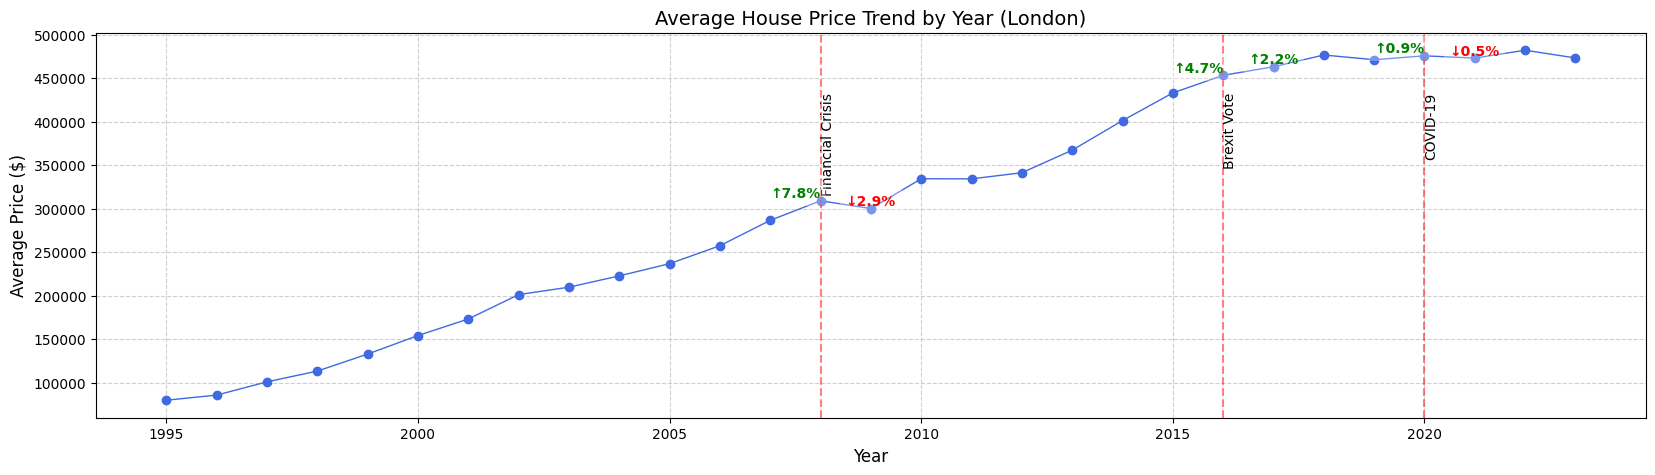

In [6]:
display(Markdown("1. How has the average price changed yearly/monthly? Are there cyclical patterns (e.g., post-2008 crash, Brexit, COVID)?"))

# Convert sale_year/month to datetime for easier analysis
df['sale_date'] = pd.to_datetime(df['sale_year'].astype(str) + '-' + df['sale_month'].astype(str) + '-01')

# Yearly average price
yearly_avg = df.groupby('sale_year')['price'].mean()

plt.figure(figsize=(20, 5))
yearly_avg.plot(marker='o', color='royalblue', linewidth=1)
plt.title('Average House Price Trend by Year (London)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Highlight key events
events = {'2008': 'Financial Crisis', '2016': 'Brexit Vote', '2020': 'COVID-19'}
for year, label in events.items():
    year  = int(year)
    plt.axvline(x=int(year), color='red', linestyle='--', alpha=0.5)
    plt.text(int(year), yearly_avg.max()*0.9, label, rotation=90, va='top')
    
    # Add percent change annotations
    try:     
        align = 'right'
        for _ in range(2): 
            y1 = yearly_avg[year-1]
            y2 = yearly_avg[year]
            pct_change = (y2 - y1)/y1 * 100
            
            # Color coding
            color = 'green' if pct_change >= 0 else 'red'
            arrow = '↑' if pct_change >= 0 else '↓'

            plt.text(year, y2, 
                     f'{arrow}{abs(pct_change):.1f}%', 
                     ha= align, 
                     va = 'bottom', 
                     color=color,
                     bbox=dict(facecolor='white', alpha=0.3, edgecolor='none'),
                     fontweight='bold',
                     linespacing=1.5)                      
            year = year + 1 
            align = 'center'
        
    except KeyError:
        pass  # Skip if data not available for that year

plt.show()